# Pandas, Matplotlib and Seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

[Dataset Soruce](https://www.kaggle.com/datasets/rajkumarpandey02/gdp-in-usd-per-capita-income-by-country)

CONTENT
<p>The figures presented here do not take into account differences in the cost of living in different countries, and the results vary greatly from one year to another based on fluctuations in the exchange rates of the country's currency. Such fluctuations change a country's ranking from one year to the next, even though they often make little or no difference to the standard of living of its population.

GDP per capita is often considered an indicator of a country's standard of living; however, this is inaccurate because GDP per capita is not a measure of personal income.

Comparisons of national income are also frequently made on the basis of purchasing power parity (PPP), to adjust for differences in the cost of living in different countries. (See List of countries by GDP (PPP) per capita.) PPP largely removes the exchange rate problem but not others; it does not reflect the value of economic output in international trade, and it also requires more estimation than GDP per capita. On the whole, PPP per capita figures are more narrowly spread than nominal GDP per capita figures.</p>

Here are some resources to learn about GDP: 
#### [World Bank](https://data.worldbank.org/indicator/ny.gdp.pcap.cd?most_recent_value_desc=false)
#### [Our World in Data](https://ourworldindata.org/grapher/gdp-per-capita-worldbank)
#### [IMF](https://www.imf.org/external/datamapper/NGDPD@WEO/OEMDC/ADVEC/WEOWORLD)
#### [UN Data](https://data.un.org/Data.aspx?d=SNAAMA&f=grID%3A101%3BcurrID%3AUSD%3BpcFlag%3A1)



# Read and save the ‘GDP (nominal) per Capita’ csv

In [2]:
df = pd.read_csv("GDP (nominal) per Capita.csv",encoding= 'unicode_escape',  index_col=0)

## EDA (Exploratory Data Analysis)

### Use this section to explore and inspect dataset.

### Main Statistics

In [4]:
print(df.describe())

        IMF_Estimate     IMF_Year  WorldBank_Estimate  WorldBank_Year  \
count     223.000000   223.000000          223.000000      223.000000   
mean    15351.632287  1787.098655        18927.417040     1957.278027   
std     22550.899445   650.695912        29103.564915      353.145867   
min         0.000000     0.000000            0.000000        0.000000   
25%      1406.500000  2023.000000         2273.500000     2021.000000   
50%      5421.000000  2023.000000         6805.000000     2021.000000   
75%     19697.000000  2023.000000        23715.000000     2021.000000   
max    132372.000000  2023.000000       234316.000000     2021.000000   

         UN_Estimate  
count     223.000000  
mean    17767.304933  
std     28698.104167  
min         0.000000  
25%      2039.000000  
50%      6396.000000  
75%     20740.000000  
max    234317.000000  


### Basic information

In [6]:
#Information about the data
print(df.info)

print(df.head(10))

<bound method DataFrame.info of     Country/Territory UN_Region  IMF_Estimate  IMF_Year  WorldBank_Estimate  \
1              Monaco    Europe             0         0              234316   
2       Liechtenstein    Europe             0         0              157755   
3          Luxembourg    Europe        132372      2023              133590   
4             Ireland    Europe        114581      2023              100172   
5             Bermuda  Americas             0         0              114090   
..                ...       ...           ...       ...                 ...   
219            Malawi    Africa           496      2023                 635   
220       South Sudan    Africa           467      2023                1072   
221      Sierra Leone    Africa           415      2023                 480   
222       Afghanistan      Asia           611      2020                 369   
223           Burundi    Africa           249      2023                 222   

     WorldBank_Year

### Print Last 5 rows

In [29]:
# Last 5 rows
print(df.tail(5))


    Country/Territory UN_Region  IMF_Estimate  IMF_Year  WorldBank_Estimate  \
219            Malawi    Africa           496      2023                 635   
220       South Sudan    Africa           467      2023                1072   
221      Sierra Leone    Africa           415      2023                 480   
222       Afghanistan      Asia           611      2020                 369   
223           Burundi    Africa           249      2023                 222   

     WorldBank_Year  UN_Estimate UN_Year  
219            2021          613    2021  
220            2015          400    2021  
221            2021          505    2021  
222            2021          373    2021  
223            2021          311    2021  


### Printing two specific columns

In [30]:
# Printing two columns
print(df[['Country/Territory', 'UN_Region']])
# Printing two columns

    Country/Territory UN_Region
1              Monaco    Europe
2       Liechtenstein    Europe
3          Luxembourg    Europe
4             Ireland    Europe
5             Bermuda  Americas
..                ...       ...
219            Malawi    Africa
220       South Sudan    Africa
221      Sierra Leone    Africa
222       Afghanistan      Asia
223           Burundi    Africa

[223 rows x 2 columns]


### Number of Countries per Region

In [8]:
# number of countries per region
region_counts = df.groupby('UN_Region').size()
print(region_counts)

UN_Region
Africa      55
Americas    48
Asia        51
Europe      48
Oceania     20
World        1
dtype: int64


In [ ]:
#What is European Union[n 1]?

### Countries in Europe Below Average

In [9]:
# Countries in Europe below average
europe_df = df[df['UN_Region']== 'Europe']
europe_avg = europe_df['IMF_Estimate'][europe_df['IMF_Estimate'] != 0].mean()
print(f"European average IMF_Estimate: {europe_avg}")

European average IMF_Estimate: 38452.186046511626


In [ ]:


# Countries in Europe below average
below_avg_europe = europe_df[europe_df["IMF_Estimate"] < europe_avg]
below_avg_europe_sorted = below_avg_europe[['Country/Territory', 'IMF_Estimate']].sort_values(by='IMF_Estimate', ascending=False)
print(below_avg_europe[['Country/Territory', 'IMF_Estimate']])

          Country/Territory  IMF_Estimate
1                    Monaco             0
2             Liechtenstein             0
9               Isle of Man             0
14          Channel Islands             0
15            Faroe Islands             0
40                    Malta         36989
41                    Italy         36812
51                 Slovenia         32214
52           Czech Republic         31368
53                    Spain         31223
54                  Estonia         31209
57                Lithuania         28094
59                 Portugal         26012
60                   Latvia         25136
62                 Slovakia         23457
63                   Greece         22595
70                  Croatia         20537
72                   Poland         19912
75                  Hungary         19385
78                  Romania         18530
87                 Bulgaria         14893
90                   Russia         14403
103              Montenegro       

# Plot distribution of GDP per capita in Europe

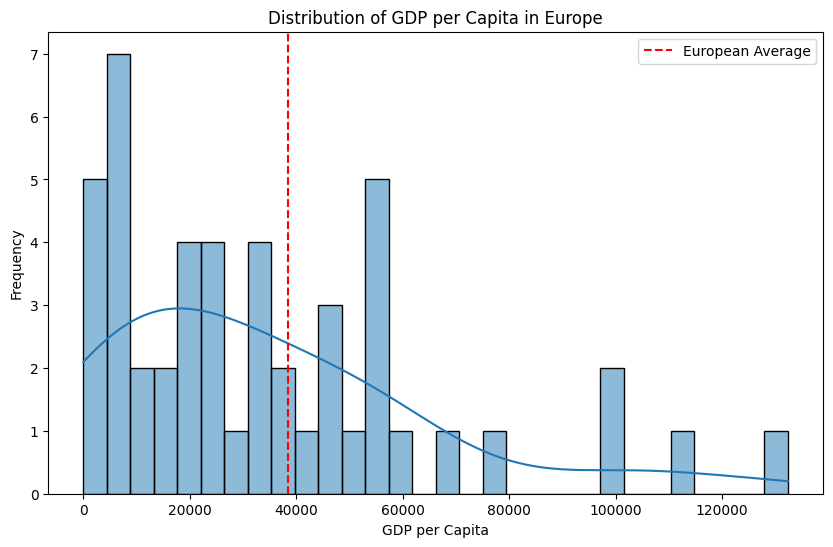

In [11]:
# Plotting the distribution of GDP per capita in Europe
plt.figure(figsize=(10, 6))
sns.histplot(europe_df['IMF_Estimate'], bins=30, kde=True)
plt.axvline(europe_avg, color='red', linestyle='--', label='European Average')
plt.title('Distribution of GDP per Capita in Europe')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Countries with higher GDP than the UK

In [ ]:
## Which countries in Europe has higher GDP than UK?
uk_gdp = europe_df[europe_df['Country/Territory'] == 'United Kingdom']['IMF_Estimate'].values[0]
higher_than_uk = europe_df[europe_df['IMF_Estimate'] > uk_gdp]
higher_than_uk_sorted = higher_than_uk[['Country/Territory', 'IMF_Estimate']].sort_values(by='IMF_Estimate', ascending=False)
print(f"Countries with higher GDP than UK: \n{higher_than_uk_sorted}")

# Plotting the distribution of GDP per capita in Europe

Countries with higher GDP than UK: 
   Country/Territory  IMF_Estimate
3         Luxembourg        132372
4            Ireland        114581
6             Norway        101103
7        Switzerland         98767
13           Iceland         75180
16           Denmark         68827
18       Netherlands         61098
20           Austria         56802
22            Sweden         55395
23           Finland         54351
24           Belgium         53377
25        San Marino         52949
28           Germany         51383



## groupby()

[Learn more about groupby](https://www.geeksforgeeks.org/pandas-groupby/)

## Which countries below average by IMF world estimate?

Countries with below average GDP: 
    Country/Territory  IMF_Estimate
87           Bulgaria         14893
88              Palau         14804
89         Costa Rica         14733
90             Russia         14403
91              China         13721
..                ...           ...
39      New Caledonia             0
104              Cuba             0
196          Zanzibar             0
204             Syria             0
212       North Korea             0

[159 rows x 2 columns]


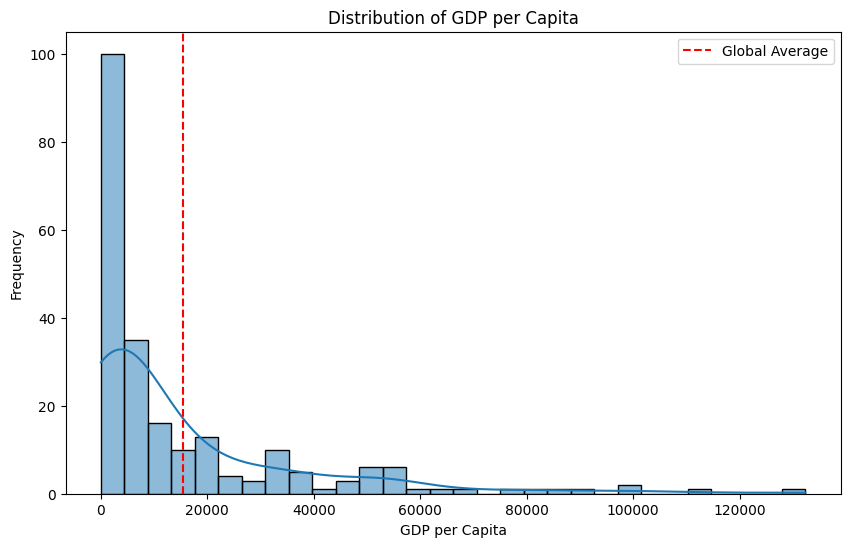

In [14]:
# Find the countries below average GDP by IMF World estimate
below_avg = df[df['IMF_Estimate'] < df['IMF_Estimate'].mean()]
below_avg_sorted = below_avg[['Country/Territory', 'IMF_Estimate']].sort_values(by='IMF_Estimate', ascending=False)
print(f"Countries with below average GDP: \n{below_avg_sorted}")

# Plotting the distribution of GDP per capita in Europe
plt.figure(figsize=(10, 6))
sns.histplot(df['IMF_Estimate'], bins=30, kde=True)
plt.axvline(df['IMF_Estimate'].mean(), color='red', linestyle='--', label='Global Average')
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### IMF estimate 0 values

## Which country has highest UN Estimate?

In [15]:
# Find the country with the highest UN Estimate
highest_un_estimate = df[df['UN_Estimate'] == df['UN_Estimate'].max()]
highest_un_estimate_sorted = highest_un_estimate[['Country/Territory', 'UN_Estimate']]
print(f"Country with highest UN Estimate: \n{highest_un_estimate_sorted}")

Country with highest UN Estimate: 
  Country/Territory  UN_Estimate
1            Monaco       234317


## Which country has highest Worlbank Estimate?

In [18]:
# Find the country with the highest Worldbank Estimate
highest_worldbank_estimate = df[df['WorldBank_Estimate'] == df['WorldBank_Estimate'].max()]
highest_worldbank_estimate_sorted = highest_worldbank_estimate[['Country/Territory', 'WorldBank_Estimate']]
print(f"Country with highest Worldbank Estimate: \n{highest_worldbank_estimate_sorted}")


Country with highest Worldbank Estimate: 
  Country/Territory  WorldBank_Estimate
1            Monaco              234316


## Which country has highest IMF Estimate?

In [20]:
# Find the country with the highest IMF Estimate
highest_IMF_estimate = df[df['IMF_Estimate'] == df['IMF_Estimate'].max()]
highest_IMF_estimate_sorted = highest_IMF_estimate[['Country/Territory', 'IMF_Estimate']]
print(f"Country with highest IMF Estimate: \n{highest_IMF_estimate_sorted}")



Country with highest IMF Estimate: 
  Country/Territory  IMF_Estimate
3        Luxembourg        132372


## Filling 0 Values by average

In [21]:
import numpy as np

# Replacing null values

In [31]:
# replace 0 with null values
# find any null values
print(df.isnull().sum())

# replace 0 with null values
df.replace(0, np.nan, inplace=True)

# Print any newly replaced values
print(df.isnull().sum())


Country/Territory     0
UN_Region             0
IMF_Estimate          0
IMF_Year              0
WorldBank_Estimate    0
WorldBank_Year        0
UN_Estimate           0
UN_Year               0
dtype: int64
Country/Territory      0
UN_Region              0
IMF_Estimate          26
IMF_Year              26
WorldBank_Estimate     7
WorldBank_Year         7
UN_Estimate            9
UN_Year                0
dtype: int64


In [ ]:
# Calculate the average of 'Worldbank_Estimate' and 'UN_Estimate' columns


In [ ]:
# Fill the null values in 'imf' column with the calculated average


In [ ]:
# Drop the temporary 'avg_worldbank_un' column if not needed


[Visit this link to learn more about ffill](https://www.w3schools.com/python/pandas/ref_df_ffill.asp)

[Visit this link to learn more about bfill](https://www.w3schools.com/python/pandas/ref_df_bfill.asp)

## Checking Missing Values

## Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histogram

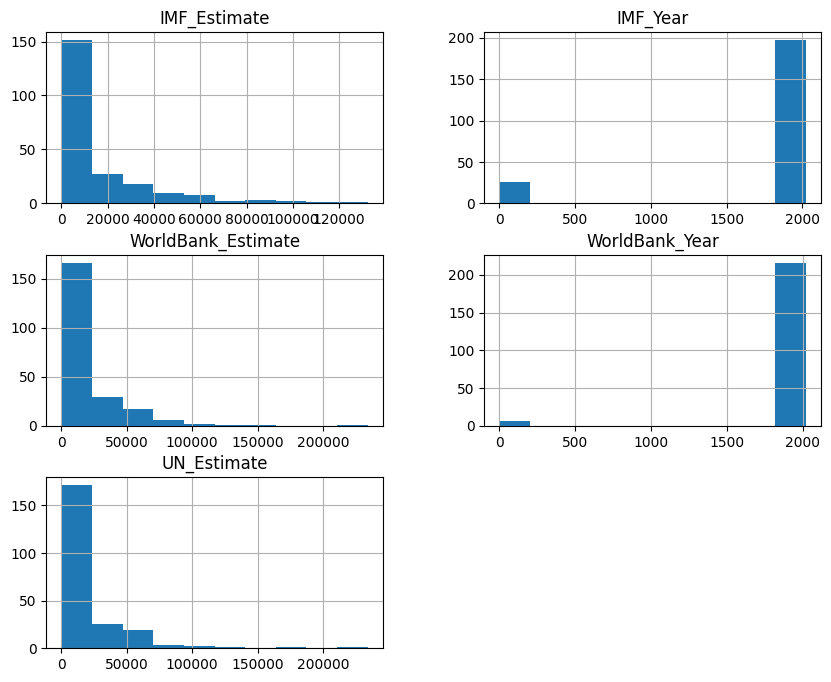

In [22]:
df.hist(figsize=(10,8))
plt.show()

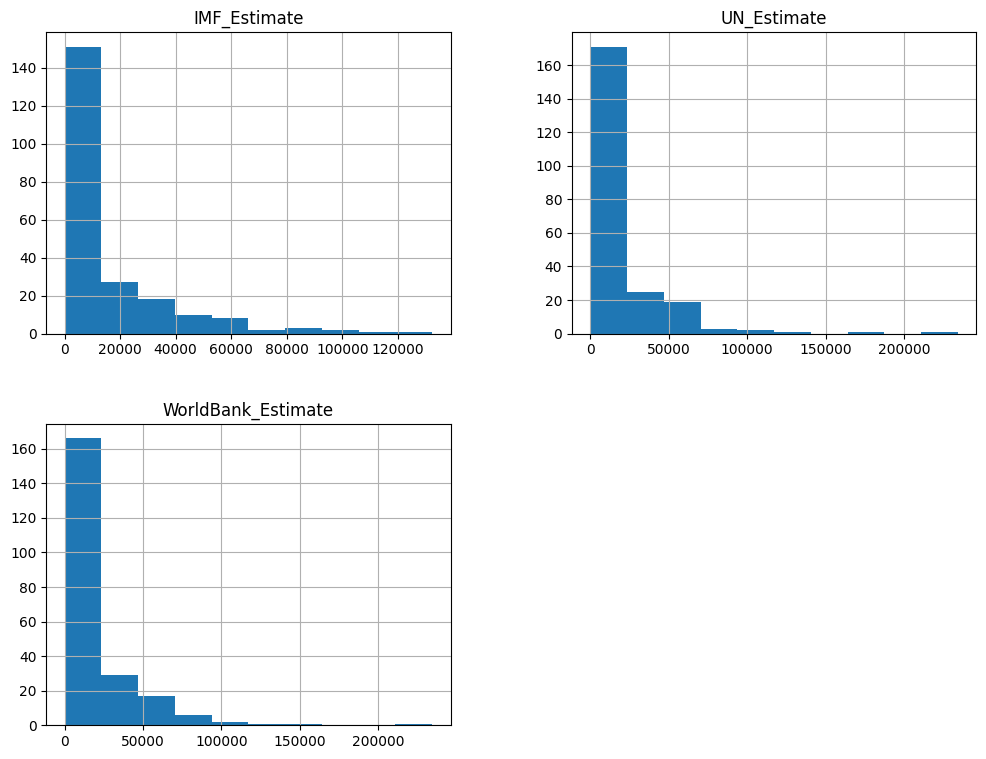

In [ ]:
# Plotting the distribution of GDP per capita for IMF, UN, and World Bank estimates
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(figsize=(12,9))

plt.show()

In [ ]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=5, figsize=(12,9))

plt.show()

In [24]:
df["WorldBank_Estimate"].agg(["min","max"])

min         0
max    234316
Name: WorldBank_Estimate, dtype: int64

In [ ]:
234316/5
#1 bin size if bins=5

In [ ]:
df[df["WorldBank_Estimate"]<=46863.2]["WorldBank_Estimate"].count()

In [ ]:
234316/10
#1 bin size if bins not given any number

In [ ]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=3, figsize=(12,9))

plt.show()

In [ ]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=15, figsize=(15,12))

#23400/15 = 15300
plt.show()

### Correlation Heatmap

In [25]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

,IMF_Estimate,UN_Estimate,WorldBank_Estimate
IMF_Estimate,1.000000,0.626513,0.587988
UN_Estimate,0.626513,1.000000,0.930331
WorldBank_Estimate,0.587988,0.930331,1.000000


### Plotting a correlation Heatmap matrix

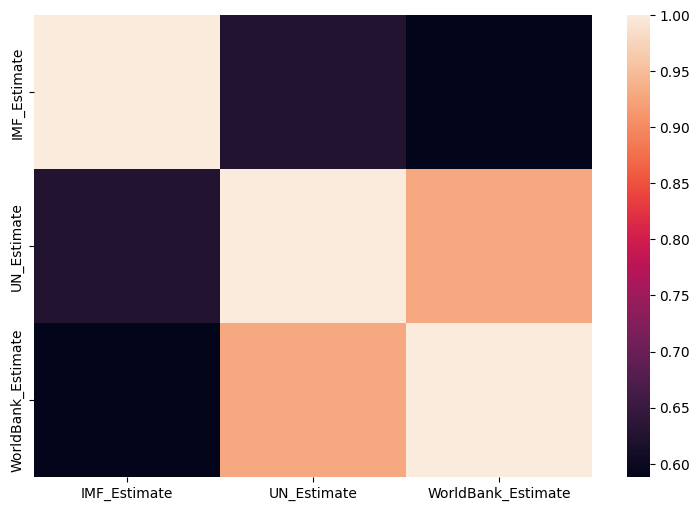

In [ ]:
# Plotting the correlation heat map matrix
corr = df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

plt.figure(figsize=(9,6))
sns.heatmap(corr)

plt.show()

In [ ]:
corr = df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True)

plt.show()

In [ ]:
corr = df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True, fmt=".2f", cmap = 'GnBu', annot_kws={"size": 12})

plt.show()

In [ ]:
corr = df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True, cmap = 'Purples')

plt.title("Correlation Map")


plt.show()

In [ ]:
corr = df.select_dtypes(include=[int, float]).corr()
 
plt.figure(figsize=(9,6))
 
sns.heatmap(corr, annot=True, cmap = 'Purples')
 
plt.show()

### Bar plot

In [27]:
df.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021


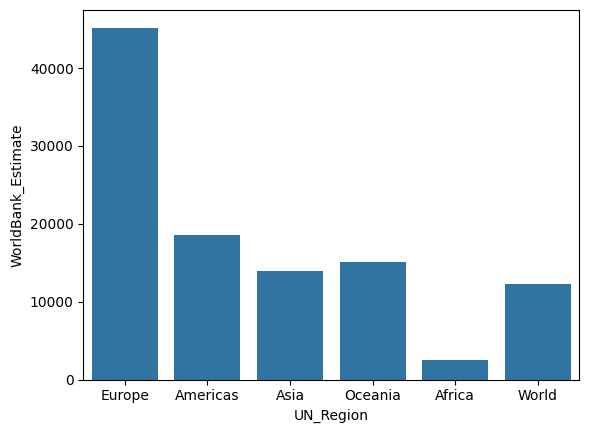

In [ ]:
# Plotting the distribution of GDP per capita for IMF, UN, and World Bank estimates using Seaborn
sns.barplot(x="UN_Region", y="WorldBank_Estimate", data=df, errorbar=None)

plt.show()

In [ ]:
sns.barplot(x="WorldBank_Estimate", y="UN_Region", data=df, errorbar=None)

plt.show()

In [ ]:
fig = plt.figure(figsize = (8,5))

ax = sns.barplot(x = "IMF_Estimate",  y = "UN_Region",  
data = df, errorbar = None)

ax.bar_label(ax.containers[0])

plt.show()

In [ ]:
fig = plt.figure(figsize = (8,5)) 
ax = sns.barplot(x = "UN_Region",  y = "IMF_Estimate", 
                 data = df, errorbar = None) 

ax.bar_label(ax.containers[0]) 


ax.set_title("Regions by IMF Estimate")
plt.show()

### Scatter Plot

In [ ]:
df.plot(x='UN_Region', y='UN_Estimate', kind='scatter',
        figsize=(10,6),
        title="Scatter Plot")

plt.show()

### Boxplot and Outliers

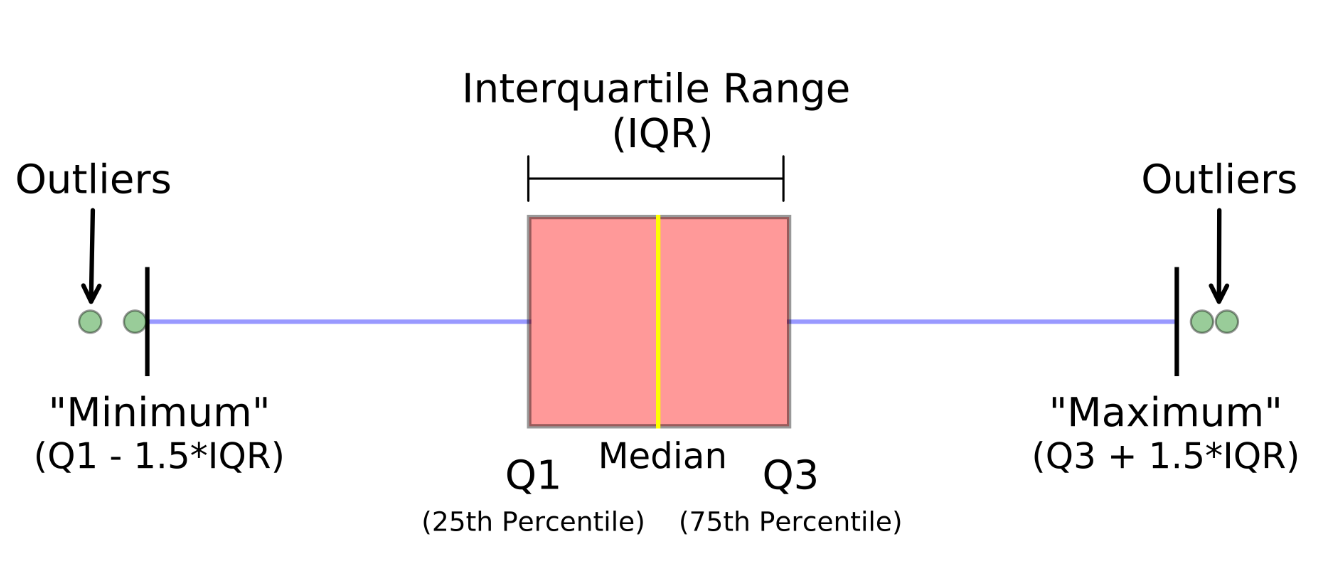

In [ ]:
sns.boxplot(x=df["UN_Estimate"])

plt.show()

In [ ]:
df[df["UN_Estimate"]>50000].head()

In [ ]:
sns.boxplot(x=df["WorldBank_Estimate"])

plt.show()

In [ ]:
sns.boxplot(x=df["IMF_Estimate"])

plt.show()

In [ ]:
df[df["UN_Estimate"]>100000]

In [ ]:
df.UN_Estimate.mean()

In [ ]:
df.shape

## Create another dataframe called data excluding  5 countries with highest UN estimate

In [ ]:
data = df[-(df["UN_Estimate"]>100000)]

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.UN_Estimate.mean()

In [ ]:
df.UN_Estimate.mean()

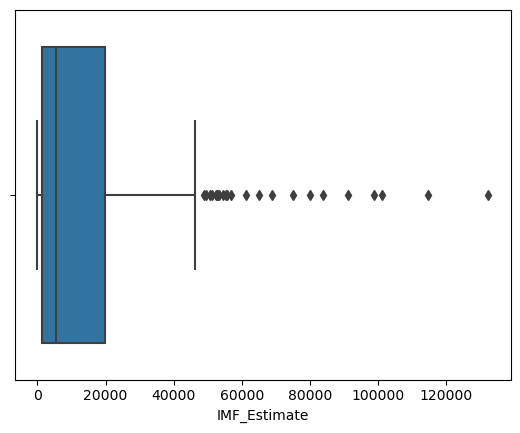

In [ ]:
sns.boxplot(x=data["UN_Estimate"])
plt.show()

## Removing outliers

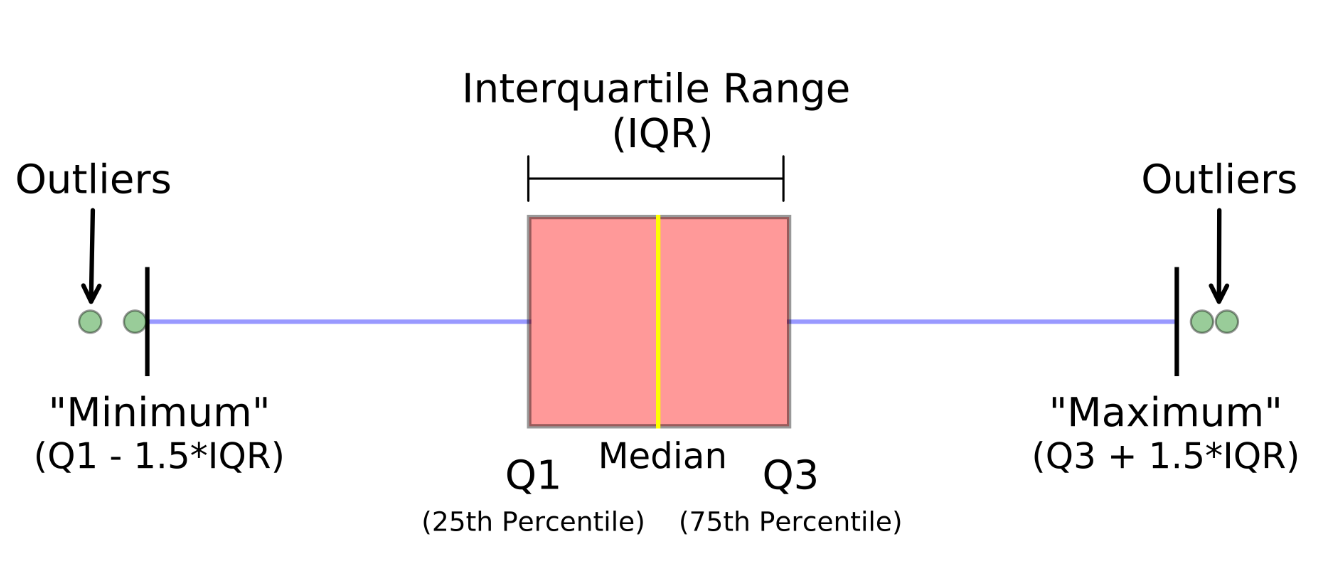

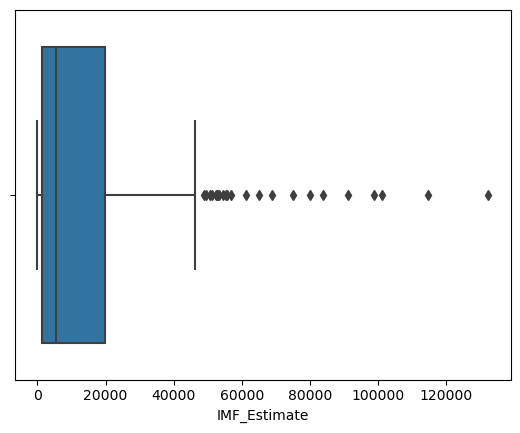

In [ ]:
lower_q = df["UN_Estimate"].quantile(0.25)
lower_q

In [ ]:
higher_q = df["UN_Estimate"].quantile(0.75)
higher_q

In [ ]:
iqr = higher_q - lower_q
iqr

In [ ]:
upper_boundary = higher_q + 1.5 * iqr
upper_boundary

In [ ]:
lower_boundary = lower_q - 1.5 * iqr
lower_boundary

In [ ]:
df_filtered = df[(df["UN_Estimate"] < upper_boundary) & (df["UN_Estimate"] > lower_boundary)]

In [ ]:
df_filtered.head()

In [ ]:
df_filtered.shape
# there were 223 rows - 196 = 27 outliers dropped

In [ ]:
df_filtered.UN_Estimate.mean()

In [ ]:
df.UN_Estimate.mean()

In [ ]:
#how can we create a table with following 
df_filtered.WorldBank_Estimate.mean()

In [ ]:
df.WorldBank_Estimate.mean()

In [ ]:
df_filtered.IMF_Estimate.mean()

In [ ]:
df.IMF_Estimate.mean()